In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Maps one range to another
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [68]:
def QRandom1(a, b, qubits=2):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(2, 'c0')
    circ.add_register(c0)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c0)

    #display(circ.draw(output='mpl'))


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range( output.size ):
        if abs(output[i]) != 0:
            #print(i, output[i])
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])
    
    y = real_map(n1+n2+n3, -qubits, len(output)-1+qubits, a, b) 
    plot_state_city(output)
    return y

In [69]:
def QRandom2(a, b, theta, depth, qubits=2):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    circ = QuantumCircuit(q)
    c0 = ClassicalRegister(2, 'c0')
    circ.add_register(c0)
    
    for j in range(depth):
        
        for i in range(qubits):
            circ.h(q[i])
            circ.ry(theta, q[i])
            circ.rx(theta, q[i])

    for i in range(qubits):
        circ.measure(q[i], c0)

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()
    output = result.get_statevector(circ, decimals=5)

    n1 = 0
    n2 = 0
    n3 = 0
    for i in range( output.size ):
        if abs(output[i]) != 0:
            #print(i, output[i])
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])
    
    y = real_map(n1+n2+n3, -qubits, len(output)-1+qubits, a, b) 
    plot_state_city(output)
    return y

In [61]:
m=0
length = 0
theta = 0

number = int(input('Enter the number of random numbers required'))
low = int(input('Enter lower limit'))
high = int(input('Enter higher limit'))

depth=3
x=[]
n=1
while length!=number:
    y = QRandom(low,high,theta,depth,3)
    while (y in x):
        i=i+1
        theta = theta + pi/16
        y= QRandom(low,high,theta,depth,3)
        if(i==(16*n)):
            depth = depth+1
            n=n+1
    x.append(y)
    length=len(x) 

Enter the number of random numbers required40
Enter lower limit0
Enter higher limit100


In [62]:
x

[53.84615384615385,
 30.76923076923077,
 30.808384615384615,
 38.500692307692304,
 49.09230769230769,
 72.16923076923077,
 82.54815384615384,
 53.88530769230769,
 64.47692307692307,
 81.04892307692307,
 43.510076923076916,
 17.440846153846152,
 62.53046153846154,
 21.555384615384614,
 25.165692307692307,
 29.247692307692308,
 29.57892307692308,
 31.446384615384616,
 31.84592307692308,
 38.46153846153847,
 42.18330769230769,
 41.095,
 66.08161538461539,
 69.06184615384615,
 76.92307692307693,
 68.65938461538461,
 84.78430769230769,
 87.76453846153846,
 86.82453846153845,
 54.33653846153847,
 69.23076923076923,
 84.61538461538461,
 76.02700000000002,
 61.69638461538462,
 68.33469230769231,
 48.36423076923077,
 48.825923076923075,
 28.387923076923077,
 36.080230769230766,
 43.11553846153846]

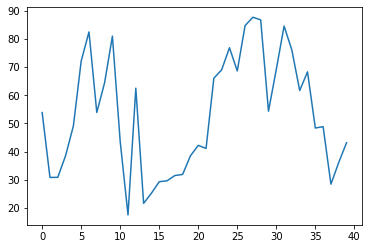

In [63]:
plt.plot(x)

In [66]:
m=0
number = int(input('Enter the number of random numbers required'))
low = int(input('Enter lower limit'))
high = int(input('Enter higher limit'))
temp = high+1
theta = 0
depth=3
x=[]
n=1
length = 0
while length!=number:
    y = QRandom(low,high,theta,depth,2)
    while (y in x):
        i=i+1
        theta = theta + pi/16
        y= QRandom(low,high,theta,depth,2)
        if(i==(16*n)):
            depth = depth+1
            n=n+1
    x.append(y)
    length=len(x) 

Enter the number of random numbers required40
Enter lower limit0
Enter higher limit1


In [67]:
x

[0.7142857142857143,
 0.42857142857142855,
 0.5714285714285714,
 0.6414942857142858,
 0.8148685714285714,
 0.40572,
 0.08471857142857142,
 0.8046842857142857,
 0.3312171428571428,
 0.09889999999999999,
 0.1297542857142857,
 0.15192571428571428,
 0.15805285714285716,
 0.58891,
 0.8868885714285714,
 0.9120157142857143,
 0.41248,
 0.9101857142857143,
 0.3759557142857143,
 0.8571428571428571,
 0.76368,
 0.6728185714285715,
 0.25117,
 0.2782857142857143,
 0.6092885714285714,
 0.4243571428571428,
 0.7560585714285715,
 0.14832428571428571,
 0.6283057142857142,
 0.30271571428571425,
 0.6043485714285713,
 0.47843142857142856,
 0.48774428571428574,
 0.48509714285714284,
 0.4830685714285714,
 0.6058228571428571,
 0.74868,
 0.4986371428571429,
 0.8323442857142858,
 0.23046571428571427]

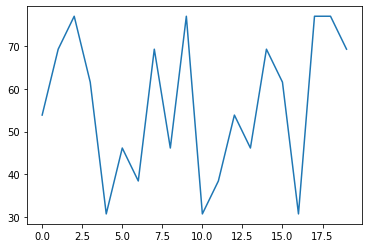

In [85]:
y = []
for i in range(20):
    y.append(QRandom1(0,100,3))
    
plt.plot(y)

In [76]:
x

[76.92307692307693,
 61.53846153846154,
 53.84615384615385,
 76.92307692307693,
 30.76923076923077,
 84.61538461538461,
 46.15384615384615,
 53.84615384615385,
 69.23076923076923,
 84.61538461538461]

In [81]:
m=0
number = int(input('Enter the number of random numbers required'))
low = int(input('Enter lower limit'))
high = int(input('Enter higher limit'))
temp = high+1
theta = 0
depth=3
x=[]
n=1
length = 0
while length!=number:
    y = QRandom(low,high,theta,depth,2)
    while (y in x):
        i=i+1
        theta = theta + pi/16
        y= QRandom(low,high,theta,depth,2)
        if(i==(16*n)):
            depth = depth+1
            n=n+1
    x.append(y)
    length=len(x) 

Enter the number of random numbers required20
Enter lower limit0
Enter higher limit100


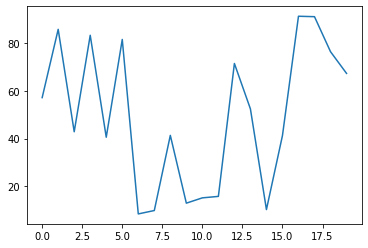

In [83]:
plt.plot(x)

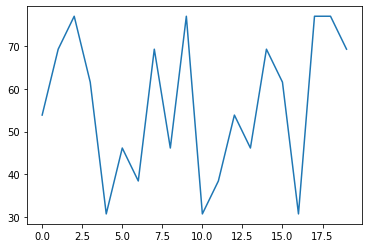

In [86]:
plt.plot(y)

In [87]:
x

[57.14285714285714,
 85.71428571428571,
 42.857142857142854,
 83.23442857142858,
 40.572,
 81.48685714285713,
 8.471857142857143,
 9.889999999999999,
 41.343857142857146,
 12.975428571428571,
 15.192571428571428,
 15.805285714285716,
 71.42857142857143,
 52.41957142857142,
 10.289285714285715,
 41.248000000000005,
 91.20157142857143,
 91.01857142857142,
 76.36800000000001,
 67.28185714285715]

In [88]:
y

[53.84615384615385,
 69.23076923076923,
 76.92307692307693,
 61.53846153846154,
 30.76923076923077,
 46.15384615384615,
 38.46153846153847,
 69.23076923076923,
 46.15384615384615,
 76.92307692307693,
 30.76923076923077,
 38.46153846153847,
 53.84615384615385,
 46.15384615384615,
 69.23076923076923,
 61.53846153846154,
 30.76923076923077,
 76.92307692307693,
 76.92307692307693,
 69.23076923076923]

In [ ]:
m=0
number = int(input('Enter the number of random numbers required'))
low = int(input('Enter lower limit'))
high = int(input('Enter higher limit'))
temp = high+1
theta = 0
depth=3
x=[]
n=1
length = 0
while length!=number:
    y = QRandom(low,high,theta,depth,2)
    while (y in x):
        i=i+1
        theta = theta + pi/16
        y= QRandom(low,high,theta,depth,2)
        if(i==(16*n)):
            depth = depth+1
            n=n+1
    x.append(y)
    length=len(x) 